#Q1:

Data source: ImageNet: hWp://www.image-net.org
Write a program to
1. load an RGB image of any image format (JPG, PNG, etc.) and size
using OpenCV and convert it to gray image with a resolution of
256x256.
2. Display both RGB and Gray image side-by-side using matplotlib
3. Save the Gray image as <same-name>.JPG.
4. Flip the RGB Image horizontally and vertically and display the
original and flipped images side-by-side.
5. Perform random crops of 128x128 and rescale it to 256x256. Display
the center point and a rectangle of 128x128 on the RGB image and
cropped & scaled image side by side.

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def convert_to_gray(rgb_image):
    # Get dimensions of the image
    height, width, _ = rgb_image.shape

    # Create an empty grayscale image of the same size
    gray_image = np.zeros((height, width), dtype=np.uint8)

    # Loop through each pixel in the RGB image
    for y in range(height):
        for x in range(width):
            # Get the RGB values of the current pixel
            r, g, b = rgb_image[y, x]

            # Calculate grayscale value using the formula: gray = 0.2989 * R + 0.5870 * G + 0.1140 * B
            gray_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)

            # Set the grayscale value in the corresponding pixel of the gray image
            gray_image[y, x] = gray_value

    return gray_image

def flip_image(image, flip_direction):
    height, width, channels = image.shape
    flipped_image = np.empty_like(image)

    if flip_direction == 'horizontal':
        for y in range(height):
            for x in range(width):
                flipped_image[y, x] = image[y, width - x - 1]
    elif flip_direction == 'vertical':
        for y in range(height):
            flipped_image[y] = image[height - y - 1]
    else:
        flipped_image = image  # No flipping

    return flipped_image

# Load the RGB image
image_path = '/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/RGB_image.jpg'
original_image = cv2.imread(image_path)

# Check if the image was loaded correctly
if original_image is None:
    print("Error: Image not loaded. Check the image path.")
else:
    # Get the base filename without extension
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Resize the image to 256x256 if it's not empty
    if original_image.shape[0] > 0 and original_image.shape[1] > 0:
        target_size = (256, 256)
        resized_image = cv2.resize(original_image, target_size)

        # Convert the resized RGB image to grayscale using the custom function
        gray_image = convert_to_gray(resized_image)

        # Perform horizontal flipping manually
        flipped_horizontal = flip_image(resized_image, 'horizontal')

        # Perform vertical flipping manually
        flipped_vertical = flip_image(resized_image, 'vertical')

        # Display images using matplotlib
        plt.figure(figsize=(15, 5))

        # Display original RGB image
        plt.subplot(1, 4, 1)
        plt.imshow(resized_image)
        plt.title('Original RGB Image')
        plt.axis('off')

        # Display grayscale image
        plt.subplot(1, 4, 2)
        plt.imshow(gray_image, cmap='gray')
        plt.title('Gray Image')
        plt.axis('off')

        # Display horizontally flipped RGB image
        plt.subplot(1, 4, 3)
        plt.imshow(flipped_horizontal)
        plt.title('Horizontally Flipped')
        plt.axis('off')

        # Display vertically flipped RGB image
        plt.subplot(1, 4, 4)
        plt.imshow(flipped_vertical)
        plt.title('Vertically Flipped')
        plt.axis('off')

        plt.show()

        # Save the grayscale image with the same name as the original RGB image
        gray_image_path = os.path.join('/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1', f'{base_filename}.JPG')
        cv2.imwrite(gray_image_path, gray_image)
    else:
        print("Error: Invalid image dimensions.")


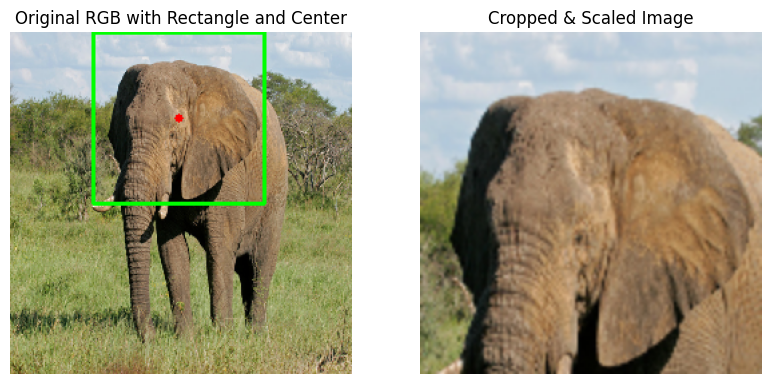

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def convert_to_gray(rgb_image):
    height, width, _ = rgb_image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            r, g, b = rgb_image[y, x]
            gray_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            gray_image[y, x] = gray_value

    return gray_image

def custom_convert_color(image):
    return image[..., ::-1]

# Load the RGB image
image_path = '/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/RGB_image.jpg'
original_image = cv2.imread(image_path)

# Check if the image was loaded correctly
if original_image is None:
    print("Error: Image not loaded. Check the image path.")
else:
    # Get the base filename without extension
    base_filename = os.path.splitext(os.path.basename(image_path))[0]

    # Resize the image to 256x256 if it's not empty
    if original_image.shape[0] > 0 and original_image.shape[1] > 0:
        target_size = (256, 256)
        resized_image = cv2.resize(original_image, target_size)

        # Convert the resized RGB image to grayscale using the custom function
        gray_image = convert_to_gray(resized_image)

        # Randomly crop a 128x128 region from the resized RGB image
        y_start = np.random.randint(0, resized_image.shape[0] - 128)
        x_start = np.random.randint(0, resized_image.shape[1] - 128)
        cropped_image = resized_image[y_start:y_start+128, x_start:x_start+128, :]

        # Rescale the cropped image to 256x256
        scaled_cropped_image = cv2.resize(cropped_image, (256, 256))

        # Calculate the center point
        center_x = x_start + 64
        center_y = y_start + 64

        # Create a copy of the original RGB image for visualization
        visualization_image = resized_image.copy()

        # Draw a rectangle and center point on the visualization image
        rectangle_color = (0, 255, 0)  # Green color
        cv2.rectangle(visualization_image, (x_start, y_start), (x_start + 128, y_start + 128), rectangle_color, 2)
        cv2.circle(visualization_image, (center_x, center_y), 3, (0, 0, 255), -1)

        # Display images using matplotlib
        plt.figure(figsize=(15, 5))

        # Display original RGB image with rectangle and center point
        plt.subplot(1, 3, 1)
        plt.imshow(custom_convert_color(visualization_image))
        plt.title('Original RGB with Rectangle and Center')
        plt.axis('off')

        # Display cropped & scaled image
        plt.subplot(1, 3, 2)
        plt.imshow(custom_convert_color(scaled_cropped_image))
        plt.title('Cropped & Scaled Image')
        plt.axis('off')
        plt.show()

    else:
        print("Error: Invalid image dimensions.")


#Q2

Data source: Use videos from KTH: hWps://www.csc.kth.se/cvap/ac4ons/
and UCF101: hWps://www.crcv.ucf.edu/data/UCF101.php
Write a program to load a sample video of any video format (AVI, MP4, etc.)
using OpenCV and extract its every kth frame (k is used specified) with
original color representation (RGB/Gray) and rescale to 256x256 size and
save them with <frame-number>.JPG to a folder <video-name>

In [ ]:
import cv2
import os

def custom_convert_color(image, color_representation):
    if color_representation == "RGB":
        return image[..., ::-1]
    elif color_representation == "Gray":
        return custom_convert_to_gray(image)
    else:
        raise ValueError("Invalid color_representation. Choose 'RGB' or 'Gray'.")

def custom_convert_to_gray(image):
    height, width, _ = image.shape
    gray_image = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            r, g, b = image[y, x]
            gray_value = int(0.2989 * r + 0.5870 * g + 0.1140 * b)
            gray_image[y, x] = gray_value

    return gray_image

def extract_frames(video_path, output_folder, k, target_size=(256, 256), color_representation="RGB"):
    try:
        # Open the video file
        cap = cv2.VideoCapture(video_path)

        # Get the video name (without extension)
        video_name = os.path.splitext(os.path.basename(video_path))[0]

        # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)

        frame_number = 0
        while True:
            ret, frame = cap.read()

            if not ret:
                break

            frame_number += 1

            if frame_number % k == 0:
                resized_frame = cv2.resize(frame, target_size)
                converted_frame = custom_convert_color(resized_frame, color_representation)

                output_path = os.path.join(output_folder, f"{frame_number}.jpg")
                cv2.imwrite(output_path, converted_frame)
                print(f"Saved frame {frame_number}")

        cap.release()
        print("Frames extraction and saving completed.")

    except Exception as e:
        print("An error occurred:", e)

if __name__ == "__main__":
    video_path = "/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/person15_walking_d1_uncomp.avi"
    output_folder = "/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/person15_walking_d1_uncomp"
    k = 10  # Replace with the desired k value (every kth frame)
    color_representation = "RGB"  # Choose "RGB" or "Gray"

    extract_frames(video_path, output_folder, k, color_representation=color_representation)


Saved frame 10
Saved frame 20
Saved frame 30
Saved frame 40
Saved frame 50
Saved frame 60
Saved frame 70
Saved frame 80
Saved frame 90
Saved frame 100
Saved frame 110
Saved frame 120
Saved frame 130
Saved frame 140
Saved frame 150
Saved frame 160
Saved frame 170
Saved frame 180
Saved frame 190
Saved frame 200
Saved frame 210
Saved frame 220
Saved frame 230
Saved frame 240
Saved frame 250
Saved frame 260
Saved frame 270
Saved frame 280
Saved frame 290
Saved frame 300
Saved frame 310
Saved frame 320
Saved frame 330
Saved frame 340
Saved frame 350
Saved frame 360
Saved frame 370
Saved frame 380
Saved frame 390
Saved frame 400
Saved frame 410
Saved frame 420
Saved frame 430
Saved frame 440
Saved frame 450
Saved frame 460
Saved frame 470
Saved frame 480
Saved frame 490
Saved frame 500
Saved frame 510
Saved frame 520
Saved frame 530
Saved frame 540
Saved frame 550
Saved frame 560
Saved frame 570
Saved frame 580
Saved frame 590
Saved frame 600
Saved frame 610
Saved frame 620
Saved frame 630
S

#Q3

Data source: MNIST: hWp://yann.lecun.com/exdb/mnist/
1. Write a program to represent each image in train/test datasets to a
frequency histogram and save to comma separated values (CSV) files
as train.csv and test.csv
2. Normalize each feature to N(0,1) also apply the respec4ve
transforma4ons to test data.
3. Use the t-SNE plot of the dataset with different color to different

class. T-SNE: hWps://scikit-
learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

4. Implement the least square method and evaluate on the dataset
generated. Use for any two classes as well as all classes.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as keras

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

def create_histogram(data, labels, output_file):
    histograms = []
    for i, image in enumerate(data):
        hist = [0] * 256
        for row in image:
            for pixel_value in row:
                hist[pixel_value] += 1
        histograms.append(hist)

    columns = [f'bin_{i}' for i in range(256)]
    df = pd.DataFrame(histograms, columns=columns)
    df['label'] = labels
    df.to_csv(output_file, index=False)
    print(f"Histograms saved to {output_file}")

    return histograms  # Return the computed histograms

# Create histograms and save to CSV for training and test datasets
train_histograms = create_histogram(train_images, train_labels, '/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/train.csv')
test_histograms = create_histogram(test_images, test_labels, '/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/test.csv')

# Plot a sample histogram for the training dataset
plt.figure(figsize=(10, 6))
plt.bar(range(255), train_histograms[0][:-1])
plt.title('Sample Training Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xticks(range(0, 256, 32), range(0, 256, 32))
plt.show()

# Plot a sample histogram for the test dataset
plt.figure(figsize=(10, 6))
plt.bar(range(255), test_histograms[0][:-1])
plt.title('Sample Test Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xticks(range(0, 256, 32), range(0, 256, 32))
plt.show()


Histograms saved to /content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/train.csv
Histograms saved to /content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/test.csv


In [ ]:
import numpy as np

def calculate_mean_std(data):
    num_samples, num_features = data.shape
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return mean, std

def normalize_data(data, mean, std):
    normalized_data = (data - mean) / std
    return normalized_data

def normalize_features(data):
    num_samples, height, width = data.shape
    data_reshaped = data.reshape(num_samples, -1)  # Flatten each image

    mean, std = calculate_mean_std(data_reshaped)
    normalized_data = normalize_data(data_reshaped, mean, std)

    return normalized_data, mean, std

# Assuming train_images is your training data and test_images is your test data

train_normalized, train_mean, train_std = normalize_features(train_images)
test_normalized = normalize_data(test_images.reshape(test_images.shape[0], -1), train_mean, train_std)

In [ ]:
from sklearn.preprocessing import StandardScaler

def normalize_features(data):
    num_samples, height, width = data.shape
    data_reshaped = data.reshape(num_samples, -1)  # Flatten each image

    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_reshaped)

    return normalized_data, scaler

train_normalized, train_scaler = normalize_features(train_images)
test_normalized = train_scaler.transform(test_images.reshape(test_images.shape[0], -1))


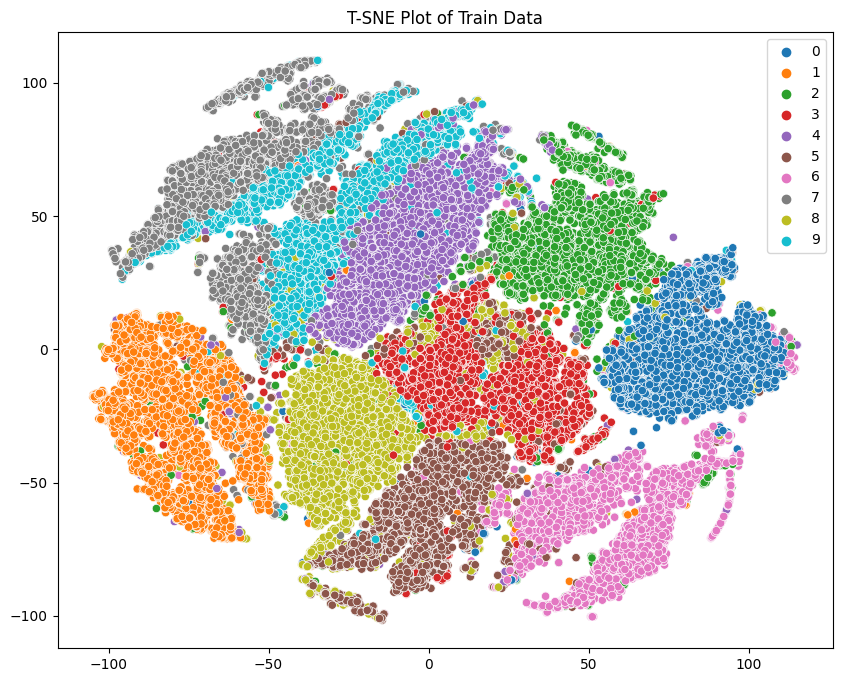

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

def plot_tsne(data, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=labels, palette="tab10")
    plt.title(title)
    plt.show()

plot_tsne(train_normalized, train_labels, "T-SNE Plot of Train Data")
plot_tsne(test_normalized, test_labels, "T-SNE Plot of Test Data")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the train and test datasets
train_data = pd.read_csv("/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/test.csv")

# Extract the features (histogram bins) and labels
X_train = train_data.drop(columns=["label"]).to_numpy()
X_test = test_data.drop(columns=["label"]).to_numpy()

y_train = train_data["label"].to_numpy()
y_test = test_data["label"].to_numpy()

# Normalize the data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

def least_squares(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    pseudo_inverse = np.linalg.pinv(X.T @ X)  # Pseudo-inverse
    w = pseudo_inverse @ X.T @ y
    return w

def predict(X, w):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return np.dot(X, w)

# Binary Classification (Class 0 vs Class 1)
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]

X_class_0_1 = np.vstack((X_train[class_0_indices], X_train[class_1_indices]))
y_class_0_1 = np.hstack((np.zeros(len(class_0_indices)), np.ones(len(class_1_indices))))

w_binary = least_squares(X_class_0_1, y_class_0_1)
predictions_binary_train = predict(X_class_0_1, w_binary)
accuracy_binary_train = accuracy_score(y_class_0_1, np.round(predictions_binary_train))
print(f"Binary Classification Train Accuracy: {accuracy_binary_train:.2f}")



Binary Classification Train Accuracy: 0.99


In [ ]:
# Binary Classification Testing (Class 0 vs Class 1)
class_0_indices_test = np.where(y_test == 0)[0]
class_1_indices_test = np.where(y_test == 1)[0]

X_class_0_1_test = np.vstack((X_test[class_0_indices_test], X_test[class_1_indices_test]))
y_class_0_1_test = np.hstack((np.zeros(len(class_0_indices_test)), np.ones(len(class_1_indices_test))))

# Predict using the trained model on the test data
predictions_binary_test = predict(X_class_0_1_test, w_binary)
accuracy_binary_test = accuracy_score(y_class_0_1_test, np.round(predictions_binary_test))
print(f"Binary Classification Test Accuracy: {accuracy_binary_test:.2f}")


Binary Classification Test Accuracy: 1.00


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the normalized histogram data and labels
train_data = pd.read_csv('/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/test.csv')

X_train_normalized = train_data.drop(columns=['label']).to_numpy()
y_train = train_data['label'].to_numpy()

X_test_normalized = test_data.drop(columns=['label']).to_numpy()
y_test = test_data['label'].to_numpy()

# Define the least squares function
def least_squares(X, y):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    pseudo_inverse = np.linalg.pinv(X.T @ X)  # Pseudo-inverse
    w = pseudo_inverse @ X.T @ y
    return w

# Initialize an array to store weights for each class
num_classes = len(np.unique(y_train))
num_features = X_train_normalized.shape[1]
w_multi = np.zeros((num_classes, num_features + 1))

# Train the model for each class using one-vs-all approach
for class_label in range(num_classes):
    # Create binary labels (1 for the current class, 0 for others)
    y_binary = np.where(y_train == class_label, 1, 0)

    # Train least squares for the current class
    w_class = least_squares(X_train_normalized, y_binary)
    w_multi[class_label] = w_class

# Predict using the trained model
def predict_multi(X, w_multi):
    X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    predictions_multi = X_with_bias @ w_multi.T
    return predictions_multi

predictions_multi_train = predict_multi(X_train_normalized, w_multi)
predicted_labels_multi_train = np.argmax(predictions_multi_train, axis=1)
accuracy_multi_train = accuracy_score(y_train, predicted_labels_multi_train)
print(f"Multi-Class Classification Train Accuracy: {accuracy_multi_train:.2f}")


Multi-Class Classification Train Accuracy: 0.28


In [ ]:
# Predict using the trained model on the test data
predictions_multi_test = predict_multi(X_test_normalized, w_multi)
predicted_labels_multi_test = np.argmax(predictions_multi_test, axis=1)
accuracy_multi_test = accuracy_score(y_test, predicted_labels_multi_test)
print(f"Multi-Class Classification Test Accuracy: {accuracy_multi_test:.2f}")


Multi-Class Classification Test Accuracy: 0.27


In [ ]:
import matplotlib.pyplot as plt

# Plot the segmentation lines
plt.figure(figsize=(10, 8))

for class_label in range(num_classes):
    plt.subplot(2, 5, class_label + 1)

    # Get the weights for the current class
    w_class = w_multi[class_label]

    # Plot the decision boundary (segmentation line)
    x_vals = np.linspace(X_train_normalized[:, 0].min(), X_train_normalized[:, 0].max(), num=100)
    y_vals = (-w_class[0] - w_class[1] * x_vals) / w_class[2]  # Assuming 3 feature dimensions

    plt.scatter(X_train_normalized[:, 0], X_train_normalized[:, 1], c=y_train, cmap='viridis')
    plt.plot(x_vals, y_vals, color='red', linewidth=2)

    plt.title(f"Class {class_label} Segmentation Line")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


#Q4

Data source: dataset generated in Q-3
Write a program for the Principal Component Analysis (PCA) from scratch.
Compute the coefficients from the train.csv and apply on both train.csv and test.csv use 2D scaWer plot to visualize both the datasets separately using
PC1 vs PC2.

Here compute the PCA transformation from scratch by following these steps:

    1.Load and normalize the train and test datasets.
    2.Compute the covariance matrix of the train dataset.
    3.Compute eigenvalues and eigenvectors.
    4.Sort eigenvalues and corresponding eigenvectors.
    5.Choose the top 2 principal components.
    6.Project train and test data onto the 2D subspace using the chosen principal components.

Finally, we use a scatter plot to visualize the results. Each point in the scatter plot represents an example from the dataset, and the color corresponds to the class label. The train data is plotted with circles, and the test data is plotted with "x" markers. The color map used is "tab10" which provides a distinct color for each class.

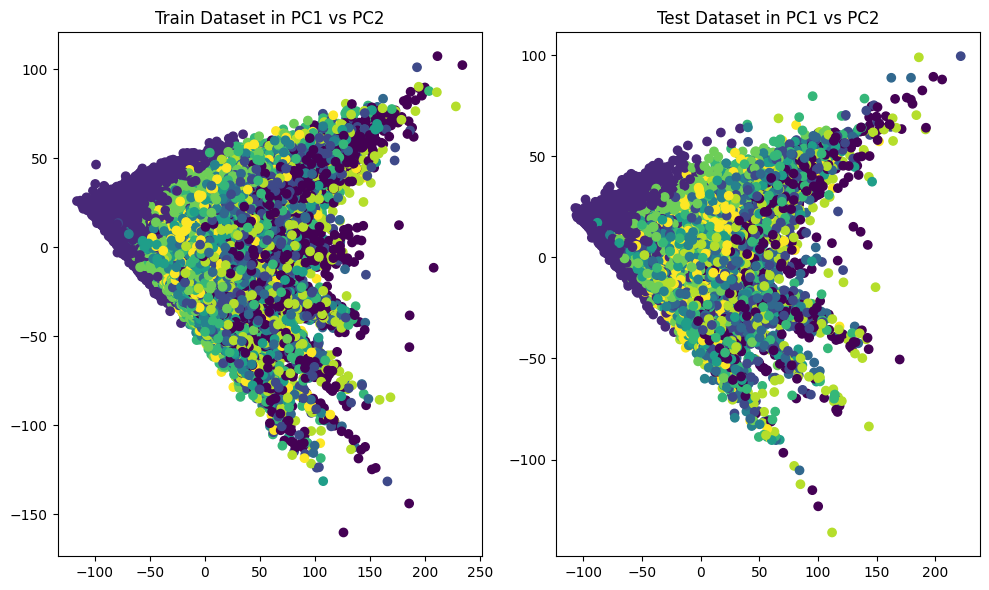

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the train and test datasets
train_data = pd.read_csv("/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/MNIST_HISTOGRAM/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/D22180_Nandani_Sharma_Assignment1/MNIST_HISTOGRAM/test.csv")

# Extract features (histogram bins) from train and test datasets
X_train = train_data.drop(columns=["label"]).values
X_test = test_data.drop(columns=["label"]).values

# Center the data
mean = X_train.mean(axis=0)
X_train_centered = X_train - mean
X_test_centered = X_test - mean

# Compute the covariance matrix
cov_matrix = (X_train_centered.T @ X_train_centered) / (X_train_centered.shape[0] - 1)

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvectors in descending order of eigenvalues
sorted_indices = eigenvalues.argsort()[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
eigenvalues_sorted = eigenvalues[sorted_indices]

# Choose the top k eigenvectors
k = 2
top_eigenvectors = eigenvectors_sorted[:, :k]

# Transform data to the new coordinate system (PC space)
X_train_pca = X_train_centered @ top_eigenvectors
X_test_pca = X_test_centered @ top_eigenvectors

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for train dataset
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=train_data["label"], cmap='viridis')
plt.title("Train Dataset in PC1 vs PC2")

# Scatter plot for test dataset
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_data["label"], cmap='viridis')
plt.title("Test Dataset in PC1 vs PC2")

plt.tight_layout()
plt.show()
